In [3]:
pip install kaggle

In [11]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [12]:
import openai
import keys
openai.api_key = keys.openai_key

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [5]:
!kaggle datasets download -d eswarchandt/amazon-music-reviews

Dataset URL: https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews
License(s): CC0-1.0
  0% 0.00/4.69M [00:00<?, ?B/s]
100% 4.69M/4.69M [00:00<00:00, 275MB/s]


In [6]:
!unzip amazon-music-reviews.zip

Archive:  amazon-music-reviews.zip
  inflating: Musical_Instruments_5.json  
  inflating: Musical_instruments_reviews.csv  


In [168]:
import pandas as pd
df = pd.read_csv('Musical_instruments_reviews.csv')

In [169]:
df_json = pd.read_json('Musical_Instruments_5.json', lines=True)

In [170]:
# fill missing values in column reviewerName with Unknown

df_json['reviewerName'] = df_json['reviewerName'].fillna('Unknown')


In [171]:
# Derive column 'derivedCol' from column: 'reviewTime'
# Transform based on the following examples:
#    reviewTime       Output
# 1: "02 28, 2014" => "02.28.2014"
df_json.insert(9, "derivedCol", df_json.apply(lambda row : row["reviewTime"].split(" ")[0] + "." + row["reviewTime"][row["reviewTime"].find(" ") + 1:row["reviewTime"].find(",")] + "." + row["reviewTime"].split(",")[-1].strip(), axis=1))

In [172]:
# Drop column: 'reviewTime'
df_json = df_json.drop(columns=['reviewTime'])

# Rename column 'derivedCol' to 'reviewTime'
df_json = df_json.rename(columns={'derivedCol': 'reviewTime'})

In [173]:
# Change column type to datetime64[ns] for column: 'reviewTime'
df_json = df_json.astype({'reviewTime': 'datetime64[ns]'})

In [174]:
 # Change column type to datetime64[ns] for column: 'reviewTime'
df_json['reviewTime'] = pd.to_datetime(df_json['reviewTime'], format="%Y-%m-%d")

In [161]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      10261 non-null  object        
 1   asin            10261 non-null  object        
 2   reviewerName    10261 non-null  object        
 3   helpful         10261 non-null  object        
 4   reviewText      10261 non-null  object        
 5   overall         10261 non-null  int64         
 6   summary         10261 non-null  object        
 7   unixReviewTime  10261 non-null  int64         
 8   reviewTime      10261 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 721.6+ KB


In [175]:
# in df_json create columns 'Helpful' and not_helpful from column 'helpful' which is list

df_json['Helpful'] = df_json['helpful'].apply(lambda x: x[0])
df_json['not_helpful'] = df_json['helpful'].apply(lambda x: x[1])
df_json = df_json.drop(columns=['helpful'])
df_json = df_json.rename(columns={'Helpful': 'helpful'})

In [176]:
df_json

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful,not_helpful
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5,good,1393545600,2014-02-28,0,0
1,A14VAT5EAX3D9S,1384719342,Jake,The product does exactly as it should and is q...,5,Jake,1363392000,2013-03-16,13,14
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,2013-08-28,1,1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14,0,0
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,2014-02-21,0,0
...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"Great, just as expected. Thank to all.",5,Five Stars,1405814400,2014-07-20,0,0
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,2014-07-02,0,0
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,2014-07-22,0,0
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,2014-07-01,0,0


In [240]:
df_json.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
helpful           0
not_helpful       0
dtype: int64

In [251]:
# create df with random 20 rows

df_small = df_json.sample(n=500).reset_index()
df_small


,index,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful,not_helpful
0,10116,A1D086N00QVF8Z,B00BU9KCXK,"I.M. ""Ricky""",I cold not believe how much more sturdy my gui...,5,This is the perfect stand!,1402876800,2014-06-16,0,0
1,781,A1NPG8GYIXYIVY,B0002D0CEO,David Y.,Great picks for beginners and pros alike! Go f...,5,Good all rounder!,1388016000,2013-12-26,0,0
2,3129,A2Y8JW5NSY95OL,B0002KZE7C,JdoubleH,Pretty disappointed in the color. As the revie...,1,Pretty dark color for chrome- maybe black chro...,1363564800,2013-03-18,1,2
3,8461,AGW1JFTQNX7SZ,B0041T53KI,jb,"Whenever I played with traditional strings, my...",3,The Proof is on My Fingers,1334448000,2012-04-15,1,2
4,4456,A3AOB0VF6H0IF4,B000CZ0RLU,Daits,Do not expect a studio quality out put from th...,5,For the price it is an excellent product,1357084800,2013-01-02,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,1456,A3M4FU3WQWJHMP,B0002E1O2C,Joehorse,I kinda strayed away from the Elixir brand for...,5,Simply.......Great !,1209081600,2008-04-25,0,0
496,6607,A1S8R9OAIQT7YI,B001J5RYXQ,patriotsarebest,Great for a beginner electric.Needed new strin...,4,Great look and play for an intro electric.,1384300800,2013-11-13,1,1
497,1001,A3NHUK1ISMZCFZ,B0002D0DWK,Unknown,The best buy for your bass drum,5,Five Stars,1405814400,2014-07-20,0,0
498,3411,A1VBRBWX7SVCVX,B0002OOMU8,Robert A. Gare,I lose picks so easily I needed a pick hold. ...,4,Good to have,1370563200,2013-06-07,2,2


In [ ]:
def gpt_analysis(df):
  prompt = (f"""Analyze the Amazon Musical Instruments Reviews dataset: {df}.
            Determine common themes of reviews.
            """)
  response = openai.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=prompt,
    max_tokens=3000
  )
  return response.choices

result = gpt_analysis(df_json)

In [210]:
print(result.choices[0].text)



1. Quality: Many reviewers commented on the quality of the musical instruments they purchased from Amazon. They mentioned the durability, accuracy, and overall build of the product. 

2. Sound: Sound was another common theme among reviews. People mentioned the clarity, tone, and overall sound projection of the instrument they bought. 

3. Price: The price of the instrument was also mentioned in many reviews. Some people felt that the instrument was worth the price, while others thought it was overpriced for the quality they received. 

4. Performance: A few reviews focused on the performance of the instrument. They mentioned how well the instrument performed for their specific purposes and how it compared to other instruments they have used in the past. 

5. Features: Features such as strings, tone knobs, and fingerboard were mentioned in some reviews. People commented on the usefulness and performance of these features. 

6. Brand: Some reviewers mentioned the brand of the instrumen

In [247]:
def generate_answer(text):
    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "user", "content": text},
            ]
        )

        result = ''
        for choice in response.choices:
            result += choice.message.content

    except Exception as e:
        return f"Oops!! Some problems with openAI. Reason: {e}"

    return result

def analyse_theme(dataset):
    for i, review in enumerate(dataset['reviewText']):
        answer = generate_answer('''
        Analyze musical instruments review and determine the theme of the review.
        Chose only one from this list of themes:
          1. Quality
          2. Sound
          3. Price
          4. Performance
          5. Features
          6. Brand
          7. Packaging
          8. Accessorie
          9. Customer Service
          10. Shipping Time
        Respond only with one theme.
        Example:'Accessories' or 'Customer Service' or 'Sound' and etc.
        You have only onу chance to answer.
        Do not write anything except the theme.
        If you cant determine the theme respond 'Unknown'.

        The review: ''' + review)
        print(f"{review},\nAnswer: {answer}")
        dataset.at[i, 'theme'] = answer
    return dataset

In [252]:
analyse_theme(df_small)

I cold not believe how much more sturdy my guitar is in this stand. I had the typical guitar stand before and had to be very careful about it tipping over. This one is so secure and my guitar has never felt like it would tip over. Small and sturdy. I use it at practice and during our live shows. You can't go wrong with this.,
Answer: Quality
Great picks for beginners and pros alike! Go for these thinner picks if you like more versatility in your playing.,
Answer: Features
Pretty disappointed in the color. As the review title indicates, what I received is more of a 'black chrome' or dingy stainless color. These are simply not going to work with the MOTS pickguard I purchased them for. Perhaps they would blend in better on a black, black pearl or tort pickguard.I ordered another package from another vendor and got the same result. Perhaps it is a large factory shipment that is 'bad'. Some are very dull looking. Very disappointing, really.,
Answer: Quality
Whenever I played with tradition

,index,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful,not_helpful,theme
0,10116,A1D086N00QVF8Z,B00BU9KCXK,"I.M. ""Ricky""",I cold not believe how much more sturdy my gui...,5,This is the perfect stand!,1402876800,2014-06-16,0,0,Quality
1,781,A1NPG8GYIXYIVY,B0002D0CEO,David Y.,Great picks for beginners and pros alike! Go f...,5,Good all rounder!,1388016000,2013-12-26,0,0,Features
2,3129,A2Y8JW5NSY95OL,B0002KZE7C,JdoubleH,Pretty disappointed in the color. As the revie...,1,Pretty dark color for chrome- maybe black chro...,1363564800,2013-03-18,1,2,Quality
3,8461,AGW1JFTQNX7SZ,B0041T53KI,jb,"Whenever I played with traditional strings, my...",3,The Proof is on My Fingers,1334448000,2012-04-15,1,2,Features
4,4456,A3AOB0VF6H0IF4,B000CZ0RLU,Daits,Do not expect a studio quality out put from th...,5,For the price it is an excellent product,1357084800,2013-01-02,0,0,Price
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1456,A3M4FU3WQWJHMP,B0002E1O2C,Joehorse,I kinda strayed away from the Elixir brand for...,5,Simply.......Great !,1209081600,2008-04-25,0,0,Brand
496,6607,A1S8R9OAIQT7YI,B001J5RYXQ,patriotsarebest,Great for a beginner electric.Needed new strin...,4,Great look and play for an intro electric.,1384300800,2013-11-13,1,1,Quality
497,1001,A3NHUK1ISMZCFZ,B0002D0DWK,Unknown,The best buy for your bass drum,5,Five Stars,1405814400,2014-07-20,0,0,Price
498,3411,A1VBRBWX7SVCVX,B0002OOMU8,Robert A. Gare,I lose picks so easily I needed a pick hold. ...,4,Good to have,1370563200,2013-06-07,2,2,Features


In [266]:
df_small['theme'].unique()

array(['Quality', 'Features', 'Price', 'Performance', 'Sound', 'Unknown',
       'Customer Service', 'Brand', 'Packaging', 'Accessories',
       'Shipping Time', 'Sound.', 'Durability'], dtype=object)

In [ ]:
# prompt: change 'Sound.' to 'Sound' in column theme

df_small['theme'] = df_small['theme'].replace('Sound.', 'Sound')


In [253]:
df_small_filtered = df_small.copy()

In [254]:
# if text in reviewText longer than 500 make it 500

df_small_filtered['reviewText'] = df_small_filtered['reviewText'].apply(lambda x: x[:500] if len(x) > 500 else x)

In [257]:
# sentiment analysis using ChatGPT
from transformers import pipeline

# Initialize the sentiment analysis model
sentiment_analyzer = pipeline('sentiment-analysis')
def analyze_sentiment(review_text):

  result = sentiment_analyzer(review_text)
  return result[0]['label']

# Add a new column to the DataFrame called "sentiment_analysis"
df_small_filtered["sentiment_analysis"] = df_small_filtered["reviewText"].apply(analyze_sentiment)



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [258]:
df_small_filtered

,index,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful,not_helpful,theme,sentiment_analysis
0,10116,A1D086N00QVF8Z,B00BU9KCXK,"I.M. ""Ricky""",I cold not believe how much more sturdy my gui...,5,This is the perfect stand!,1402876800,2014-06-16,0,0,Quality,POSITIVE
1,781,A1NPG8GYIXYIVY,B0002D0CEO,David Y.,Great picks for beginners and pros alike! Go f...,5,Good all rounder!,1388016000,2013-12-26,0,0,Features,POSITIVE
2,3129,A2Y8JW5NSY95OL,B0002KZE7C,JdoubleH,Pretty disappointed in the color. As the revie...,1,Pretty dark color for chrome- maybe black chro...,1363564800,2013-03-18,1,2,Quality,NEGATIVE
3,8461,AGW1JFTQNX7SZ,B0041T53KI,jb,"Whenever I played with traditional strings, my...",3,The Proof is on My Fingers,1334448000,2012-04-15,1,2,Features,NEGATIVE
4,4456,A3AOB0VF6H0IF4,B000CZ0RLU,Daits,Do not expect a studio quality out put from th...,5,For the price it is an excellent product,1357084800,2013-01-02,0,0,Price,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1456,A3M4FU3WQWJHMP,B0002E1O2C,Joehorse,I kinda strayed away from the Elixir brand for...,5,Simply.......Great !,1209081600,2008-04-25,0,0,Brand,POSITIVE
496,6607,A1S8R9OAIQT7YI,B001J5RYXQ,patriotsarebest,Great for a beginner electric.Needed new strin...,4,Great look and play for an intro electric.,1384300800,2013-11-13,1,1,Quality,POSITIVE
497,1001,A3NHUK1ISMZCFZ,B0002D0DWK,Unknown,The best buy for your bass drum,5,Five Stars,1405814400,2014-07-20,0,0,Price,POSITIVE
498,3411,A1VBRBWX7SVCVX,B0002OOMU8,Robert A. Gare,I lose picks so easily I needed a pick hold. ...,4,Good to have,1370563200,2013-06-07,2,2,Features,NEGATIVE


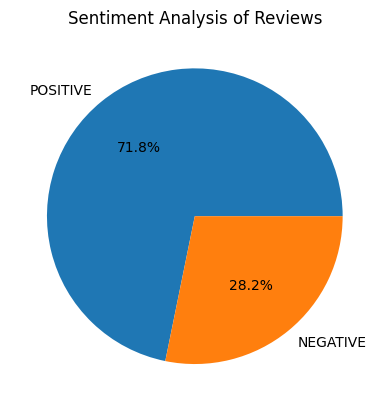

In [260]:
import matplotlib.pyplot as plt

# Get the number of reviews for each sentiment
sentiment_counts = df_small_filtered['sentiment_analysis'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Analysis of Reviews')
plt.show()


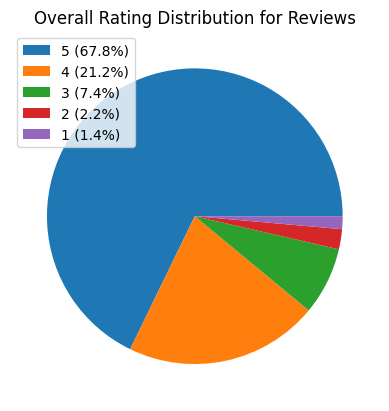

In [340]:
# Get the number of reviews for each sentiment
overall_counts = df_small_filtered['overall'].value_counts()

# Calculate percentages
percentages = [(count / overall_counts.sum()) * 100 for count in overall_counts]

# Create a pie chart
plt.pie(overall_counts, labels= None)
plt.title(f'Overall Rating Distribution for Reviews')
# Format legend labels with percentages
legend_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(overall_counts.index, percentages)]
plt.legend(labels=legend_labels, loc='best')
plt.show()

In [267]:
df_small_filtered['theme'] = df_small_filtered['theme'].replace('Sound.', 'Sound')

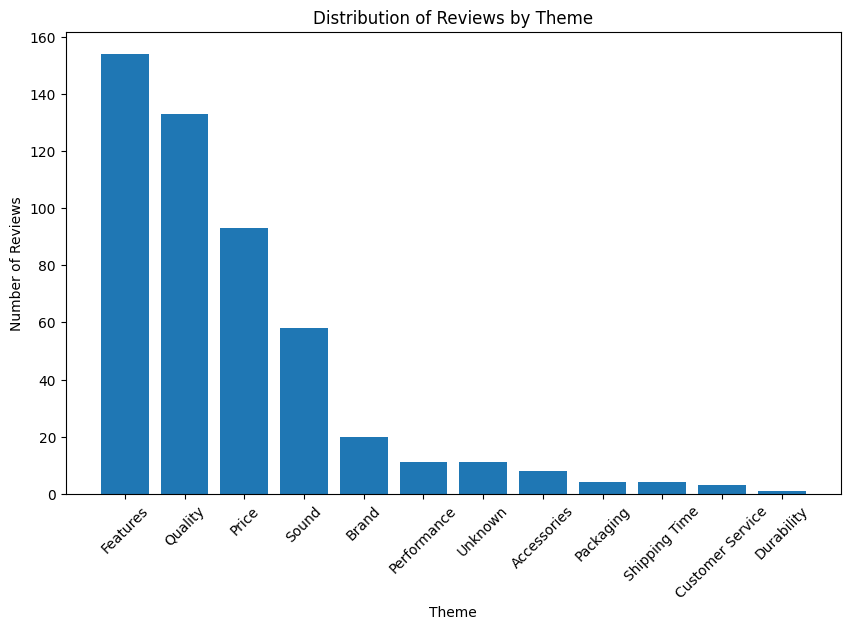

In [268]:
# Get the number of reviews for each theme
theme_counts = df_small_filtered['theme'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(theme_counts.index, theme_counts.values)
plt.title('Distribution of Reviews by Theme')
plt.xlabel('Theme')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


In [287]:
import plotly.express as px

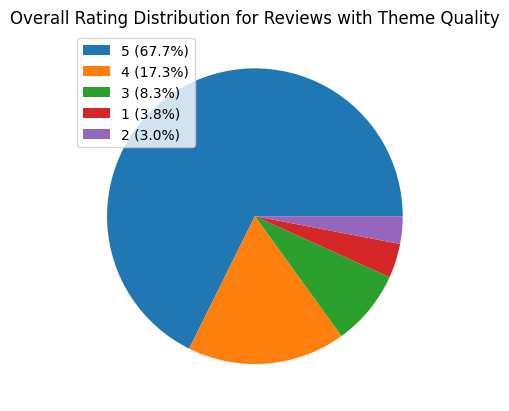

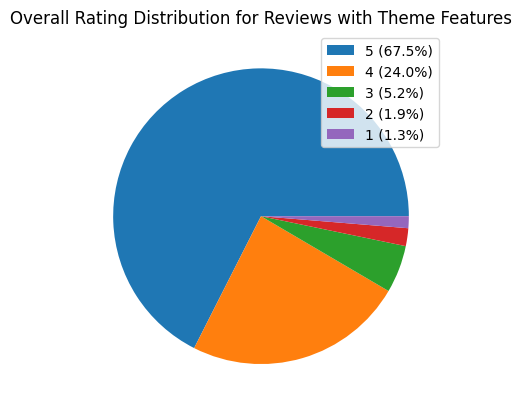

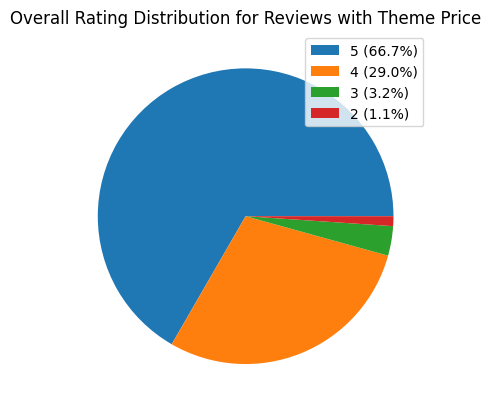

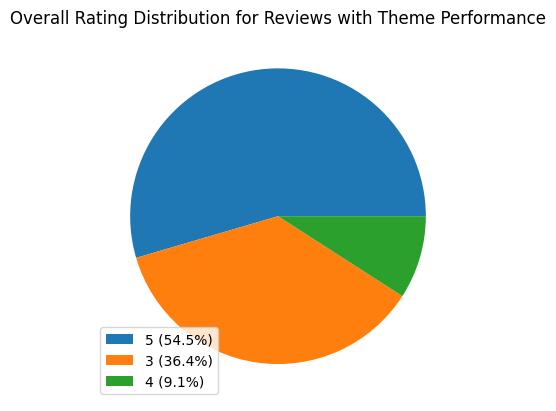

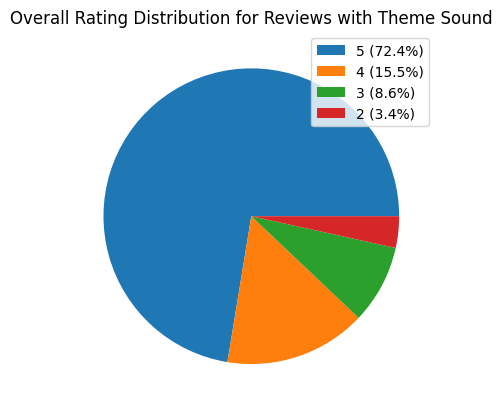

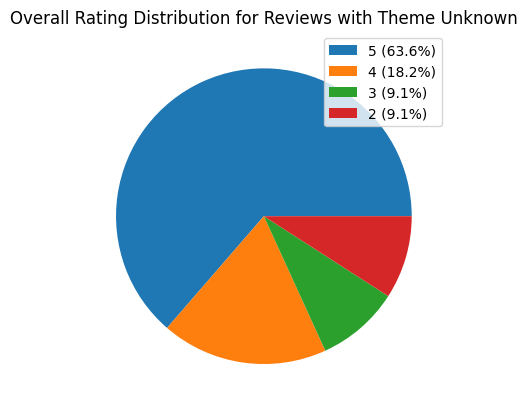

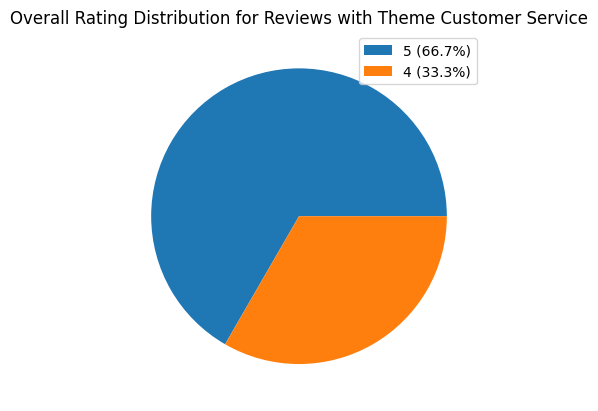

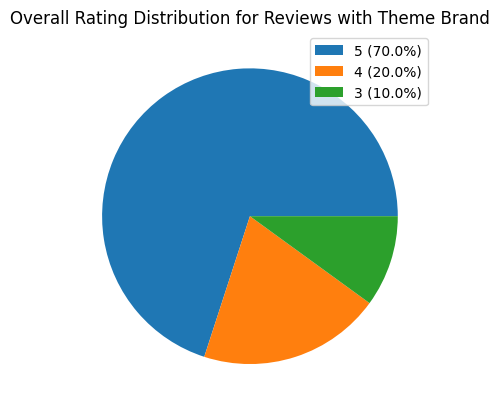

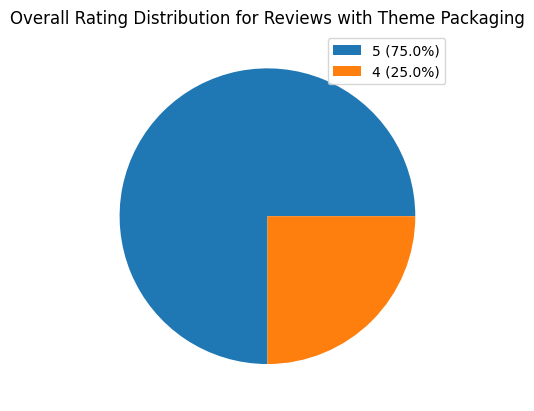

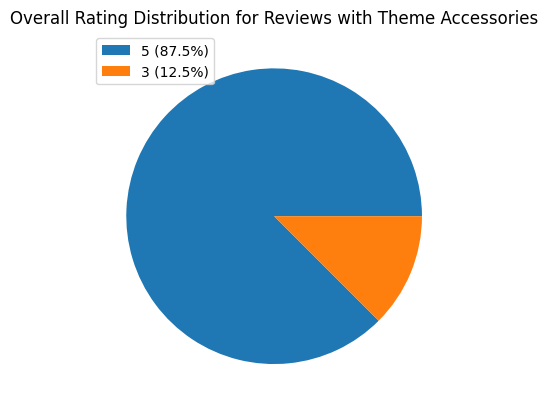

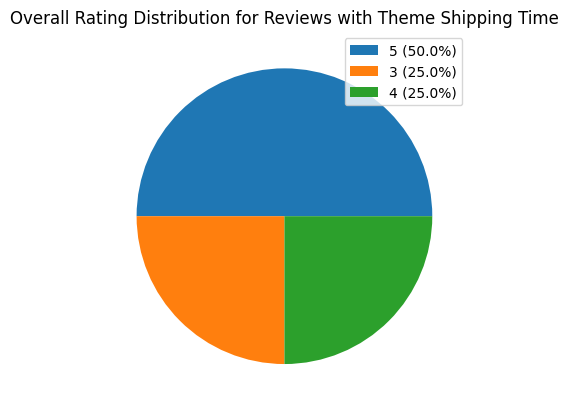

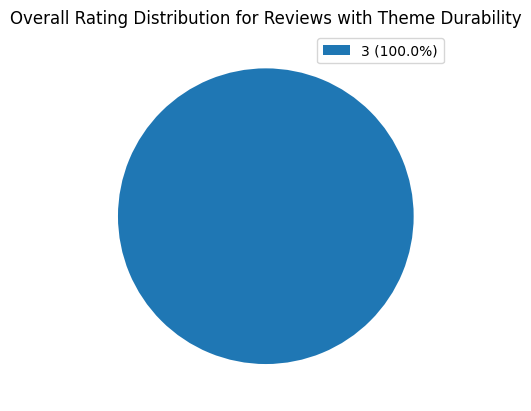

In [336]:
themes = df_small_filtered['theme'].unique()

for theme in themes:
  # Get the number of reviews for each overall rating for reviews
  df_features = df_small_filtered[df_small_filtered['theme'] == theme]
  overall_counts = df_features['overall'].value_counts()

  # Calculate percentages
  percentages = [(count / overall_counts.sum()) * 100 for count in overall_counts]

  # Create a pie chart
  plt.pie(overall_counts, labels= None)
  plt.title(f'Overall Rating Distribution for Reviews with Theme {theme}')
  # Format legend labels with percentages
  legend_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(overall_counts.index, percentages)]
  plt.legend(labels=legend_labels, loc='best')
  plt.show()
  # fig = px.pie(overall_counts, title='Sentiment Analysis of Reviews')
  # fig.show()
  plt.show()
  print('\n')

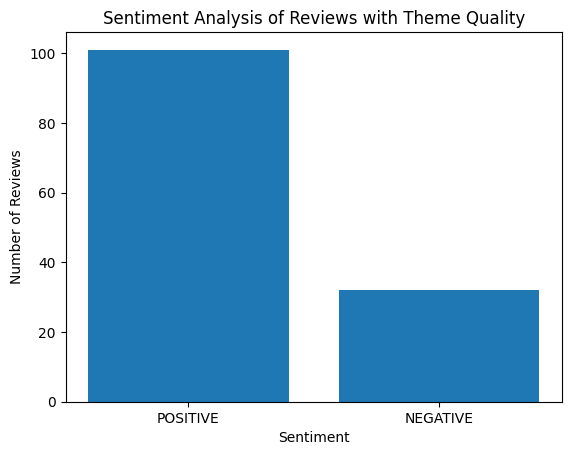

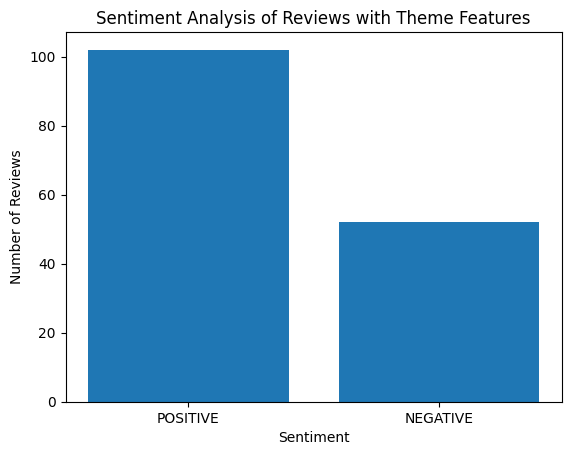

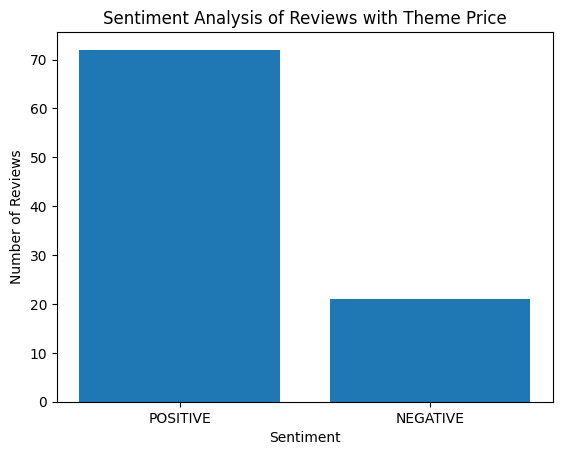

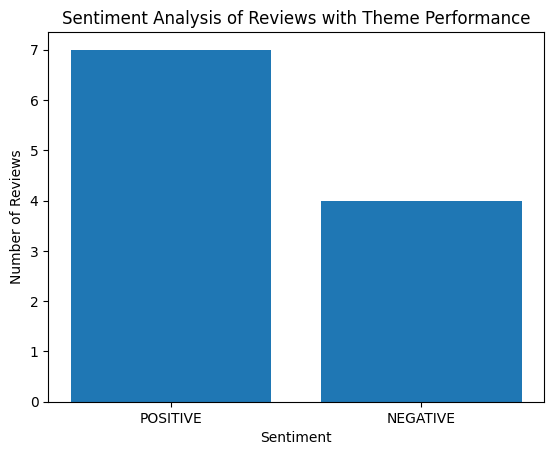

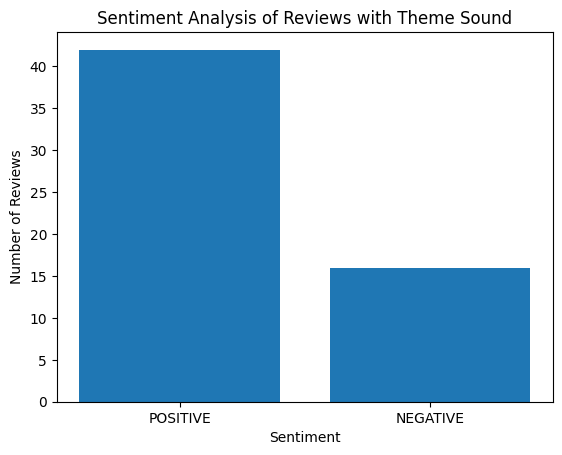

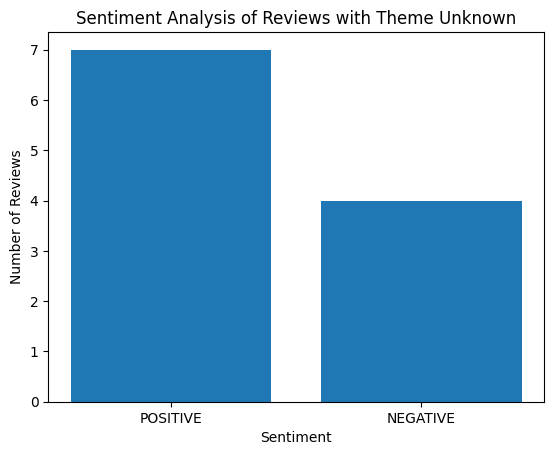

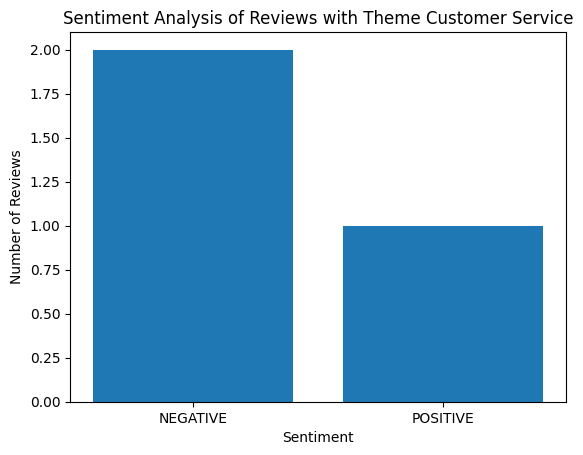

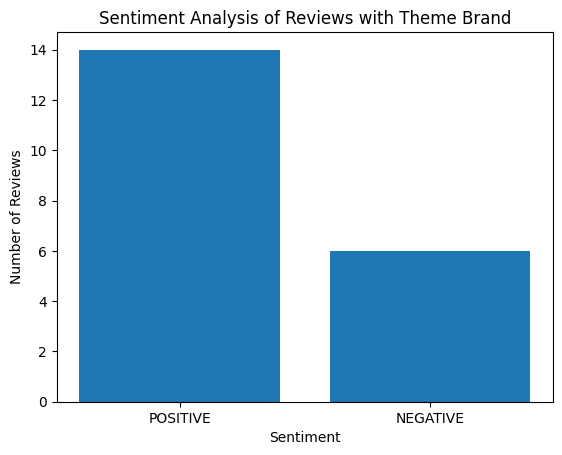

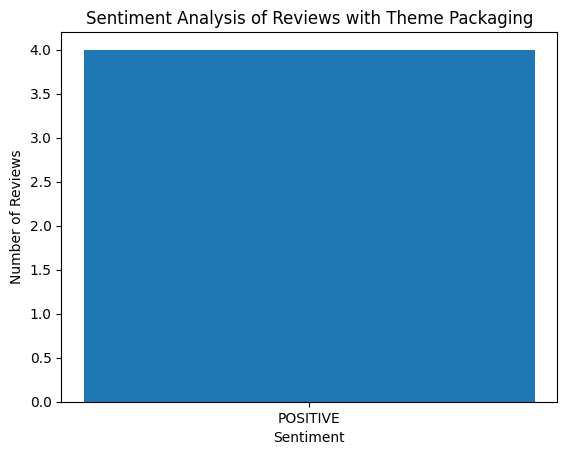

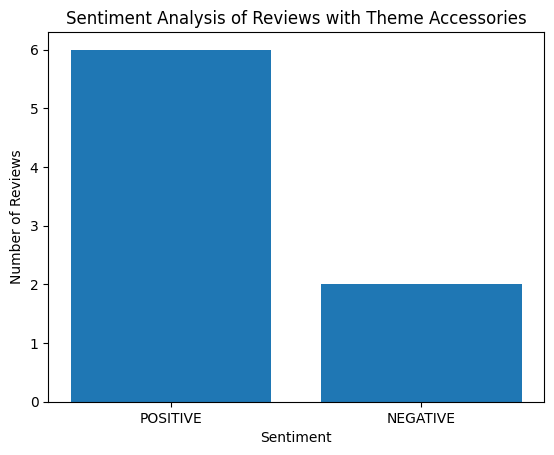

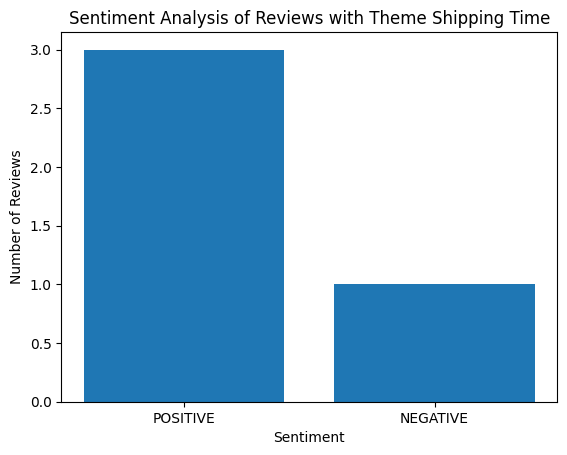

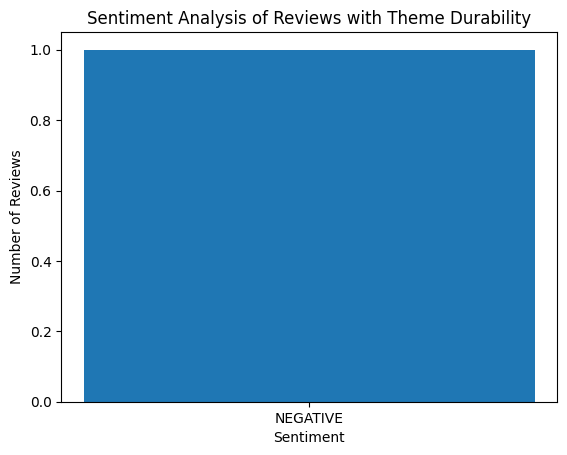

In [337]:
themes = df_small_filtered['theme'].unique()
for theme in themes:
  df_price = df_small_filtered[df_small_filtered['theme'] == f'{theme}']

  sentiment_counts = df_price['sentiment_analysis'].value_counts()

  plt.bar(sentiment_counts.index, sentiment_counts.values)
  plt.title(f'Sentiment Analysis of Reviews with Theme {theme}')
  plt.xlabel('Sentiment')
  plt.ylabel('Number of Reviews')
  plt.show()
  print('\n')
